# Analysing Sentiment with Geo Location

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import re

In [2]:
df = pd.read_csv('../Data/sentiments_geo.csv', index_col=0)

In [3]:
df.head(3)

,id,user,date,content,user_location,user_city,year,month,month_year,content_clean,comp,positive,negative,neutral,sentiment
0,1394673778492379144,"{'username': 'InsidePhilanthr', 'displayname':...",2021-05-18 15:18:35+00:00,After years of its community being upended by ...,"Los Angeles, CA",Los Angeles,2021,5,05-2021,year community upended extreme weather greater...,0.4173,0.117,0.000,0.883,positive
1,1394673502834335750,"{'username': 'gpolicywatch', 'displayname': 'G...",2021-05-18 15:17:29+00:00,"In @UNECOSOC OAS, @AOSISChair highlights ""#SID...","New York, USA",New York,2021,5,05-2021,oas highlight sids response cannot solely left...,0.0516,0.183,0.124,0.693,neutral
2,1394673249200459780,"{'username': 'Davelai11', 'displayname': 'Dave...",2021-05-18 15:16:29+00:00,Will God be awarded a Rolex to save us for coo...,"Los Angeles, CA",Los Angeles,2021,5,05-2021,god awarded rolex save u cooling u global warming,0.8225,0.658,0.000,0.342,positive


In [4]:
#extracting hashtags
df['hashtags'] = df['content'].str.findall(r'\#(\w*)').apply(', '.join)

In [5]:
df.head(3)

,id,user,date,content,user_location,user_city,year,month,month_year,content_clean,comp,positive,negative,neutral,sentiment,hashtags
0,1394673778492379144,"{'username': 'InsidePhilanthr', 'displayname':...",2021-05-18 15:18:35+00:00,After years of its community being upended by ...,"Los Angeles, CA",Los Angeles,2021,5,05-2021,year community upended extreme weather greater...,0.4173,0.117,0.000,0.883,positive,
1,1394673502834335750,"{'username': 'gpolicywatch', 'displayname': 'G...",2021-05-18 15:17:29+00:00,"In @UNECOSOC OAS, @AOSISChair highlights ""#SID...","New York, USA",New York,2021,5,05-2021,oas highlight sids response cannot solely left...,0.0516,0.183,0.124,0.693,neutral,"SIDS, debt, climatechange, inequalities"
2,1394673249200459780,"{'username': 'Davelai11', 'displayname': 'Dave...",2021-05-18 15:16:29+00:00,Will God be awarded a Rolex to save us for coo...,"Los Angeles, CA",Los Angeles,2021,5,05-2021,god awarded rolex save u cooling u global warming,0.8225,0.658,0.000,0.342,positive,


In [6]:
#most popular hashtags
hashtags_popular = df.content.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(70)
#most popular mentions
mentions_popular = df.content.str.extractall(r'\@(\w*)')[0].value_counts().nlargest(70)

In [87]:
def generate_wordcloud(x):
    
    x = x[5:] #taking out climate change hashtags - not the best way

    word_cloud = WordCloud(width=2000,height=1000, random_state=21, max_font_size=200, background_color='white', 
                           min_word_length=3, max_words=70).generate_from_frequencies(x)
    plt.figure(figsize=(10, 15),facecolor = 'white', edgecolor='blue', dpi=600)
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

In [97]:
#generate_wordcloud(hashtags_popular)
#plt.savefig('../Figures/b_popularhashtags.png')

In [98]:
#generate_wordcloud(mentions_popular)
#plt.savefig('../Figures/b_popularmentions.png')

**Most common words**

In [10]:
import nltk 

reviews = ''

for review in df['content_clean']:
    reviews += review

corpus = nltk.sent_tokenize(reviews)

In [11]:
wordfreq = {}
for sentence in corpus:
    tokens = nltk.word_tokenize(sentence)
    for token in tokens:
        if token not in wordfreq.keys():
            wordfreq[token] = 1
        else:
            wordfreq[token] += 1

In [12]:
corpus = [(wordfreq[key],key) for key in list(wordfreq.keys())]

In [13]:
corpus.sort(reverse = True)
corpus

[(7256, 'climate'),
 (6597, 'change'),
 (1650, 'climatechange'),
 (1608, 'global'),
 (1357, 'warming'),
 (792, 'u'),
 (692, 'like'),
 (687, 'people'),
 (602, 'ha'),
 (581, 'need'),
 (526, 'real'),
 (522, 'wa'),
 (482, 'year'),
 (443, 'world'),
 (435, 'one'),
 (435, 'new'),
 (411, 'time'),
 (408, 'make'),
 (377, 'get'),
 (361, 'say'),
 (342, 'think'),
 (342, 'believe'),
 (319, 'science'),
 (316, 'know'),
 (316, 'going'),
 (316, 'energy'),
 (312, 'take'),
 (308, 'day'),
 (302, 'want'),
 (299, 'trump'),
 (293, 'issue'),
 (290, 'help'),
 (288, 'today'),
 (288, 'right'),
 (287, 'way'),
 (285, 'would'),
 (281, 'planet'),
 (279, 'thing'),
 (276, 'still'),
 (276, 'fire'),
 (269, 'see'),
 (267, 'water'),
 (266, 'action'),
 (263, 'earth'),
 (260, 'work'),
 (256, 'impact'),
 (255, 'health'),
 (254, 'could'),
 (246, 'weather'),
 (235, 'stop'),
 (235, 'state'),
 (234, 'future'),
 (225, 'really'),
 (225, 'much'),
 (224, 'life'),
 (222, 'globalwarming'),
 (219, 'community'),
 (216, 'human'),
 (215, '

In [96]:
#generate_wordcloud(wordfreq)

**Negative Sentiment Hashtags**

In [15]:
df_neg = df[df['negative'] > 0.3]

In [16]:
df_neg.head(2)

,id,user,date,content,user_location,user_city,year,month,month_year,content_clean,comp,positive,negative,neutral,sentiment,hashtags
21,1394662838413807616,"{'username': 'arieshorrorshow', 'displayname':...",2021-05-18 14:35:06+00:00,I hate that I was born during the end times. L...,"Philadelphia, PA",Philadelphia,2021,5,05-2021,hate wa born end time like joke either war cli...,-0.5994,0.211,0.341,0.448,negative,
22,1394662645656137729,"{'username': 'PuseckerJ', 'displayname': 'Thom...",2021-05-18 14:34:20+00:00,Where are we going to shoot the climate change...,"Columbus, OH",Columbus,2021,5,05-2021,going shoot climate change,-0.3400,0.000,0.444,0.556,negative,


In [17]:
#Popular negative hashtags
hashtags_popular_neg = df_neg.content.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(70)

In [91]:
#generate_wordcloud(hashtags_popular_neg)
#plt.savefig('../Figures/b_neg_popularhashtags.png')

**Positive Sentiment Hashtags**

In [92]:
df_pos = df[df['positive'] > 0.3]

hashtags_popular_pos = df_pos.content.str.extractall(r'\#(\w*)')[0].value_counts().nlargest(70)

#generate_wordcloud(hashtags_popular_pos)
#plt.savefig('../Figures/b_pos_popularhashtags.png')

**Mentions Negative Sentiment**

In [93]:
mentions_popular_neg = df_neg.content.str.extractall(r'\@(\w*)')[0].value_counts().nlargest(70)

#generate_wordcloud(mentions_popular_neg)
#plt.savefig('../Figures/b_neg_popularmentions.png')

**Mentions Positive Sentiment**

In [94]:
mentions_popular_pos = df_pos.content.str.extractall(r'\@(\w*)')[0].value_counts().nlargest(70)

#generate_wordcloud(mentions_popular_pos)
#plt.savefig('../Figures/b_pos_popularmentions.png')

**Trends and Time Trends**

In [22]:
sentiment_year = df.groupby(['year', 'sentiment'])['id'].count().reset_index().rename(columns={'id': 'count'})

In [23]:
sentiment_year

,year,sentiment,count
0,2019,negative,1149
1,2019,neutral,868
2,2019,positive,1791
3,2020,negative,1062
4,2020,neutral,781
5,2020,positive,1616
6,2021,negative,1084
7,2021,neutral,861
8,2021,positive,1829


In [24]:
sentiment_city = df.groupby(['user_city', 'sentiment'])['id'].count().reset_index().rename(columns={'id': 'count'})

In [25]:
sentiment_city

,user_city,sentiment,count
0,Austin,negative,247
1,Austin,neutral,206
2,Austin,positive,446
3,Charlotte,negative,64
4,Charlotte,neutral,52
5,Charlotte,positive,106
6,Chicago,negative,243
7,Chicago,neutral,212
8,Chicago,positive,444
9,Columbus,negative,148


In [27]:
avg_city_sentiment = df.groupby(['user_city'])['comp'].mean().reset_index().rename(columns={'id': 'count'})

In [28]:
avg_city_sentiment

,user_city,comp
0,Austin,0.114048
1,Charlotte,0.097058
2,Chicago,0.115517
3,Columbus,0.071676
4,Dallas,0.038049
5,Detroit,0.129054
6,El Paso,0.103765
7,Fort Worth,0.007422
8,Honolulu,0.211700
9,Houston,0.081845


In [29]:
df['date'] = pd.to_datetime(df['date']).dt.date

In [30]:
df.head(3)

,id,user,date,content,user_location,user_city,year,month,month_year,content_clean,comp,positive,negative,neutral,sentiment,hashtags
0,1394673778492379144,"{'username': 'InsidePhilanthr', 'displayname':...",2021-05-18,After years of its community being upended by ...,"Los Angeles, CA",Los Angeles,2021,5,05-2021,year community upended extreme weather greater...,0.4173,0.117,0.000,0.883,positive,
1,1394673502834335750,"{'username': 'gpolicywatch', 'displayname': 'G...",2021-05-18,"In @UNECOSOC OAS, @AOSISChair highlights ""#SID...","New York, USA",New York,2021,5,05-2021,oas highlight sids response cannot solely left...,0.0516,0.183,0.124,0.693,neutral,"SIDS, debt, climatechange, inequalities"
2,1394673249200459780,"{'username': 'Davelai11', 'displayname': 'Dave...",2021-05-18,Will God be awarded a Rolex to save us for coo...,"Los Angeles, CA",Los Angeles,2021,5,05-2021,god awarded rolex save u cooling u global warming,0.8225,0.658,0.000,0.342,positive,


In [31]:
df['month_year'] = pd.to_datetime(df['month_year'], format='%m-%Y')

In [32]:
#Sentiment over time

sentiment_time = df.groupby(['month_year'])['comp'].mean().to_frame().reset_index().rename(columns={'comp': 'avg_comp'})

In [33]:
sentiment_time

,month_year,avg_comp
0,2019-01-01,0.089633
1,2019-02-01,0.151588
2,2019-03-01,0.065426
3,2019-04-01,0.143967
4,2019-05-01,0.086556
5,2019-06-01,0.119503
6,2019-07-01,0.070343
7,2019-08-01,0.055623
8,2019-09-01,0.078130
9,2019-10-01,0.105359


<AxesSubplot:xlabel='month_year', ylabel='avg_comp'>

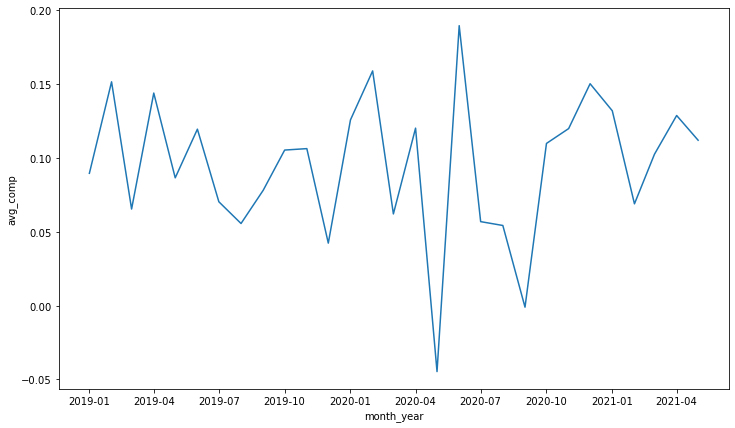

In [34]:
plt.figure(figsize=(12, 7))
sns.lineplot(x='month_year', y='avg_comp', data=sentiment_time)

In [36]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [50]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

add_stop_words = ['climate change', 'climate', 'global warming', 'amp', 'climatechange', 'global', 'warming', 
                      'globalwarming', 'just', 'climateaction', 'change', 'really', 'eco', 'climatechange', 'look', 'like', 
                  'problem', 'believe', 'struck', 'cross', 'big', 'new', 'york']
    
vectorizer = TfidfVectorizer(ngram_range = (2,3), max_df = 0.95, min_df = 3, stop_words=add_stop_words)
doc_word_nmf = vectorizer.fit_transform(df['content_clean'])
nmf_model = NMF(9)
doc_topic_nmf = nmf_model.fit_transform(doc_word_nmf)
    
topics_list = display_topics(nmf_model, vectorizer.get_feature_names(), 10)


Topic  0
veganism veganlife, peta nerd savetheplanet, seashepherd greenpeace veganism, greenpeace veganism veganlife, seashepherd greenpeace, sustainability geek, vegan seashepherd greenpeace, vegan seashepherd, greenpeace veganism, peta nerd

Topic  1
fossil fuel, fossil fuel industry, fuel industry, greenhouse gas, renewable energy, burning fossil fuel, burning fossil, fuel company, fossil fuel company, fossil fuel use

Topic  2
san francisco, francisco california, san francisco california, air quality, last week, today sky, think real, good morning, californiafires climatechangeisreal, west coast

Topic  3
making bigger, getting worse, feeling impact, seeing feeling, american seeing, impact close increasing, seeing feeling impact, impact close, increasing regularity, american seeing feeling

Topic  4
san diego, clean energy, say real, san diego california, diego california, sea level, abc san, real people, cold front, cause effect

Topic  5
greta thunberg, john kerry, year old, you

In [ ]:
#next step: classify tweets into these categories